# Puerta de Pauli-X (X)

### Explicación de la puerta

Es el equivalente al NOT clásico. Invierte el estado del qubit. Su representación matricial es: 


$$
X =\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

### Circuito de la puerta con Qiskit y Matplot



Circuito con Pauli x:


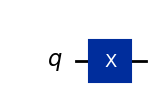

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

# Circuito básico con Pauli X (sin medir)
qc = QuantumCircuit(1)  
qc.x(0)


print("\nCircuito con Pauli x:")
qc.draw('mpl')

### Visualización de la esfera de Bloch


Estado inicial |0⟩:


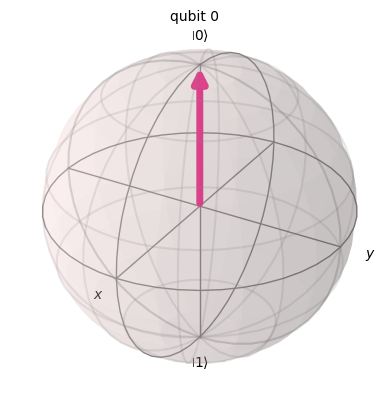


Estado después de Pauli-x (|1⟩):


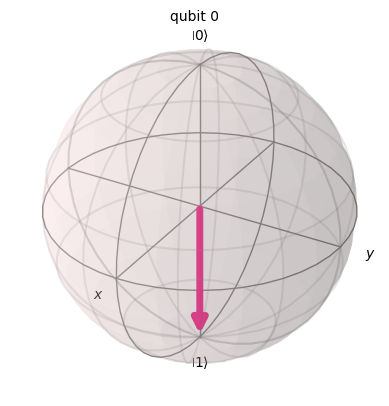

In [20]:
state_initial = Statevector.from_label('0')
print("\nEstado inicial |0⟩:")
display(plot_bloch_multivector(state_initial))


state_after_x = Statevector.from_instruction(qc)
print("\nEstado después de Pauli-x (|1⟩):")
plot_bloch_multivector(state_after_x)

### Ejecución del circuito tras 1024 shots



Estado colapsado después de medir: |1⟩

Distribución estadística (1024 shots):


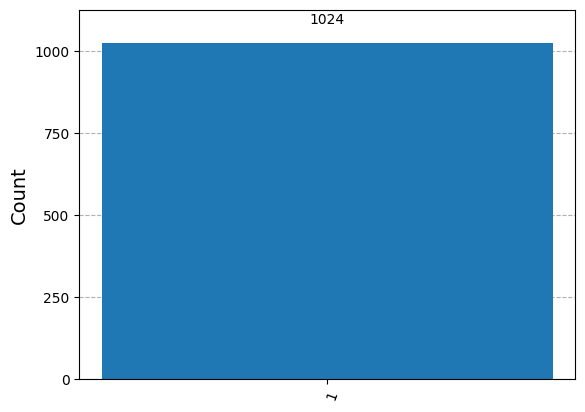


Circuito con medición:


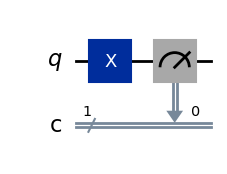

In [15]:
qc_measured = QuantumCircuit(1, 1)  
qc_measured.x(0)
qc_measured.measure(0, 0) 

# Simular colapso (1 shot)
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc_measured, shots=1, memory=True).result()
colapsed_value = result.get_memory()[0]
print(f"\nEstado colapsado después de medir: |{colapsed_value}⟩")

# Estadística con muchos shots)
result_stats = simulator.run(qc_measured, shots=1024).result()
counts = result_stats.get_counts()
print("\nDistribución estadística (1024 shots):")
display(plot_histogram(counts))

# Mostrar el circuito de medición
print("\nCircuito con medición:")
display(qc_measured.draw('mpl'))